##### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2022 Semester 1

## Assignment 2: Sentiment Classification of Tweets

This is a sample code to assist you with vectorising the 'Train' dataset for your assignment 2.

First we read the CSV datafiles (Train and Test).

In [275]:
import pandas as pd
import re
import numpy as np
import contractions
from nltk.corpus import stopwords
POSITIVE = 0
NEUTRAL = 1
NEGATIVE = 2


train_data = pd.read_csv("Train.csv", sep=',')

print(train_data.shape)
test_data = pd.read_csv("Test.csv", sep=',')

(21802, 4)


Then we separate the tweet text and the label (sentiment). 

In [276]:
from gensim.parsing.preprocessing import remove_stopwords

#separating instance and label for Train, remove the stop words

X_train_raw = [x[0] for x in train_data[['text']].values]
Y_train = [x[0] for x in train_data[['sentiment']].values]

#check the result
print("Train length:",len(X_train_raw))

#separating instance and label for Test
X_test_raw = [x[0] for x in test_data[['text']].values]

#check the result
print("Test length:",len(X_test_raw))

Train length: 21802
Test length: 6099


In [277]:
#Let's see one example tweet
print(X_train_raw[2])

 i just found out naruto didn't become the 5th hokage....	


In [296]:
#clean the data of links, tags, numbers, change all to lowercase, and finally removing stop words as well
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
stop_words.remove('not')
#print(stop_words)
def clean_data(raw_data):
    for num in range(len(raw_data)):
        #remove all links
        raw_data[num] = re.sub(r'\w+:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&\/\/=]*)', '', raw_data[num])
        #remove all tags
        raw_data[num] = re.sub(r'@\S+', '', raw_data[num])
        #Lowercase everything
        raw_data[num] = raw_data[num].lower();
        #fix all the contractions and expand them
        raw_data[num] = contractions.fix(raw_data[num])
        #removes all numbers and the string that follows it
        raw_data[num] = re.sub(r'\d+\S+\s', '', raw_data[num])
        #tokenizes every word
        tokenized_words = word_tokenize(raw_data[num])
        tweet = ""
        #for loop removes stop words and lemmatizes words ( also takes out the rest of the digits)
        for word in tokenized_words:
            if word not in stop_words:
                if not word.isdigit():
                    tweet = tweet + " " + lemmatizer.lemmatize(word)
        raw_data[num] = tweet
    return raw_data
    
X_train_raw = clean_data(X_train_raw)
X_test_raw = clean_data(X_test_raw)


### 1. Bag of Words (BoW)
In this approach, we use the **CountVectorizer** library to separate all the words in the Train corpus (dataset). These words are then used as the 'vectors' or 'features' to represent each instance (Tweet) in `Train` and `Test` datasets. 

In [279]:
from sklearn.feature_extraction.text import CountVectorizer
import re

BoW_vectorizer = CountVectorizer()

#Build the feature set (vocabulary) and vectorise the Tarin dataset using BoW
X_train_BoW = BoW_vectorizer.fit_transform(X_train_raw)

#Use the feature set (vocabulary) from Train to vectorise the Test dataset 
X_test_BoW = BoW_vectorizer.transform(X_test_raw)

print("Train feature space size (using BoW):",X_train_BoW.shape)
print("Test feature space size (using BoW):",X_test_BoW.shape)

Train feature space size (using BoW): (21802, 24597)
Test feature space size (using BoW): (6099, 24597)


Now each row is a list of tuples with the vector_id (word_id in the vocabulary) and the number of times it repeated in that given instance (tweet).

In [280]:
#Let's see one example tweet using the BoW feature space


We can save the created vocabulary for the given dataset in a separate file.

In [281]:
output_dict = BoW_vectorizer.vocabulary_
output_pd = pd.DataFrame(list(output_dict.items()),columns = ['word','count'])
print(output_pd)

output_pd.T.to_csv('BoW-vocab.csv',index=False)

             word  count
0          doctor   6076
1             hit   9797
2        campaign   3236
3           trail  21841
4            race  17073
...           ...    ...
24592      unquit  22555
24593       vemma  22850
24594   uabblazer  22245
24595  blazerlife   2443
24596      djoker   6051

[24597 rows x 2 columns]


### 2. TFIDF
In this approach, we use the **TfidfVectorizer** library to separate all the words in this corpus (dataset). Same as the BoW approach, these words are then used as the 'vectors' or 'features' to represent each instance (Tweet).

However, in this method for each instance the value associated with each 'vector' (word) is not the number of times the word repeated in that tweet, but the TFIDF value of then 'voctor' (word).

In [282]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

#Build the feature set (vocabulary) and vectorise the Tarin dataset using TFIDF
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_raw)

#Use the feature set (vocabulary) from Train to vectorise the Test dataset 
X_test_tfidf = tfidf_vectorizer.transform(X_test_raw)

print("Train feature space size (using TFIDF):",X_train_tfidf.shape)
print("Test feature space size (using TFIDF):",X_test_tfidf.shape)

Train feature space size (using TFIDF): (21802, 24597)
Test feature space size (using TFIDF): (6099, 24597)


In [283]:
#Let's see one example tweet using the TFIDF feature space
print(X_train_tfidf[1])
print('\n',X_train_tfidf[0])

  (0, 13293)	0.2693636793762146
  (0, 8227)	0.4301456554221557
  (0, 14439)	0.1926589062616687
  (0, 12864)	0.2008347513221319
  (0, 12340)	0.17556328738250698
  (0, 23813)	0.19346713652054132
  (0, 8780)	0.19026228040231222
  (0, 13154)	0.14056651258828376
  (0, 8225)	0.25561297168016944
  (0, 19113)	0.2502007392400643
  (0, 18851)	0.17879887087394603
  (0, 21708)	0.1482764280495574
  (0, 20213)	0.354711752603426
  (0, 17094)	0.31142282300372714
  (0, 8835)	0.1728242644741559
  (0, 995)	0.32586657729298196

   (0, 9888)	0.2966667797874055
  (0, 9579)	0.3650497016090329
  (0, 6658)	0.2649464379874365
  (0, 4700)	0.35884912847235273
  (0, 13272)	0.28969365171948047
  (0, 17073)	0.306680872591609
  (0, 21841)	0.36183859614200964
  (0, 3236)	0.3075562578171201
  (0, 9797)	0.24838142724779394
  (0, 6076)	0.338483826608996


In [284]:
#cross validation library:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn import metrics


In [285]:
#functions for classifiers
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)
classifier_list = ['MNB','MNB', 'SVM', 'SVM', 'Logistic Regression', 'Logistic Regression']
vectorization_list = ['Bag of Words', 'TF-IDF']*3

f1_score_list = []
precision_score_list = []
recall_score_list = []

#Applys the classifier to the given data and predicts the labels of the test data
def clfrs(clf, X_train_data, X_test_data, Y_train_data):
    clf.fit(X_train_data, Y_train)
    y_pred = clf.predict(X_test_data)
    return y_pred

#Creates the necessary csv file that can pass submission on Kaggle
def csv_transformer(y_pred, name, test_data):
    sentiments = pd.DataFrame(test_data['id'])
    sentiments['sentiment'] = y_pred
    sentiments.to_csv(name, index = False)
    
def average(scores):
    average_scores = (sum(scores))/len(scores)
    return average_scores
  
#Adds scores to a dictionary which we will later use for plotting
def addScores(scores, f1, precision, recall):
    f1.append(average(scores['test_f1_macro']))
    precision.append(average(scores['test_precision_macro']))
    recall.append(average(scores['test_recall_macro']))


In [295]:
#Implement 0-R baseline
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
y_pred_dummy= clfrs(dummy_clf, X_train_raw, X_test_raw, Y_train)
csv_transformer(y_pred_dummy, 'Zero_R_BoW.csv', test_data)


#implemented this baseline, because it makes up > 0.5 of the data, so could be accurate

In [244]:
#Implement Naive bayes classifier:
import sklearn.naive_bayes as nb
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
MNB_F1scores_BoW = cross_validate(mnb, X_train_BoW, Y_train, cv=10, scoring=['f1_macro', 'precision_macro', 'recall_macro'])
y_pred_NB_BoW = clfrs(mnb, X_train_BoW, X_test_BoW, Y_train)
csv_transformer(y_pred_NB_BoW, 'MNB_BoW.csv', test_data)

MNB_F1scores_tfidf = cross_validate(mnb, X_train_tfidf, Y_train, cv=10, scoring=['f1_macro', 'precision_macro', 'recall_macro'])
y_pred_NB_tfidf = clfrs(mnb, X_train_tfidf, X_test_tfidf, Y_train)
csv_transformer(y_pred_NB_tfidf, 'MNB_tfidf.csv', test_data)


In [245]:

addScores(MNB_F1scores_BoW, f1_score_list, precision_score_list, recall_score_list)
addScores(MNB_F1scores_tfidf, f1_score_list, precision_score_list, recall_score_list)

In [246]:
#Implement SVM classifier
from sklearn import svm
clf = svm.LinearSVC()
SVM_F1scores_BoW = cross_validate(clf, X_train_BoW, Y_train, cv=10, scoring=['f1_macro', 'precision_macro', 'recall_macro'])
y_pred_SVM_BoW = clfrs(clf, X_train_BoW, X_test_BoW, Y_train)
csv_transformer(y_pred_SVM_BoW, 'LinearSVM_BoW.csv', test_data)

SVM_F1scores_tfidf = cross_validate(clf, X_train_tfidf, Y_train, cv=10, scoring=['f1_macro', 'precision_macro', 'recall_macro'])
y_pred_SVM_tfidf = clfrs(clf, X_train_tfidf, X_test_tfidf, Y_train)
csv_transformer(y_pred_SVM_tfidf, 'LinearSVM_tfidf.csv', test_data)


In [247]:
addScores(SVM_F1scores_BoW, f1_score_list, precision_score_list, recall_score_list)
addScores(SVM_F1scores_tfidf, f1_score_list, precision_score_list, recall_score_list)


In [248]:
#Implement the Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter = 40000, multi_class = 'multinomial')
LogReg_F1scores_BoW = cross_validate(clf, X_train_BoW, Y_train, cv=10, scoring=['f1_macro', 'precision_macro', 'recall_macro'])
y_pred_LogReg_BoW = clfrs(clf, X_train_BoW, X_test_BoW, Y_train)
csv_transformer(y_pred_LogReg_BoW, 'LogisticRegression_BoW.csv', test_data)

LogReg_F1scores_tfidf = cross_validate(clf, X_train_tfidf, Y_train, cv=10, scoring=['f1_macro', 'precision_macro', 'recall_macro'])
y_pred_LogReg_tfidf = clfrs(clf, X_train_tfidf, X_test_tfidf, Y_train)
csv_transformer(y_pred_LogReg_tfidf, 'LogisticRegression_tfidf.csv', test_data)

In [249]:
addScores(LogReg_F1scores_BoW, f1_score_list, precision_score_list, recall_score_list)
addScores(LogReg_F1scores_tfidf, f1_score_list, precision_score_list, recall_score_list)

           Classifiers Vectorization Method        f1  precision    recall  \
0                  MNB         Bag of Words  0.578480   0.583170  0.575303   
1                  MNB               TF-IDF  0.344189   0.709599  0.382057   
2                  SVM         Bag of Words  0.561988   0.574184  0.553677   
3                  SVM               TF-IDF  0.575672   0.620468  0.554597   
4  Logistic Regression         Bag of Words  0.582393   0.621722  0.562459   
5  Logistic Regression               TF-IDF  0.545083   0.663907  0.518320   

   accuracy  
0   0.57523  
1   0.39729  
2   0.55432  
3   0.57236  
4   0.57113  
5   0.54899  


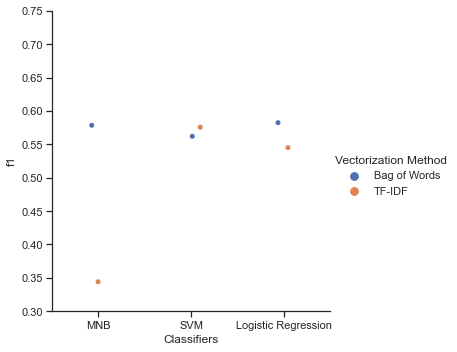

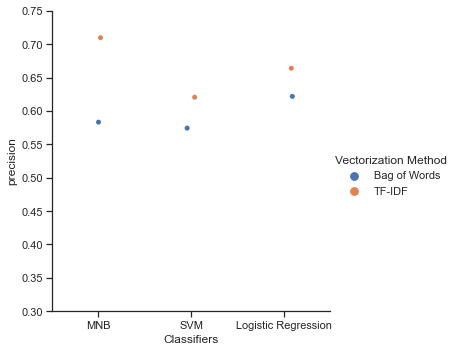

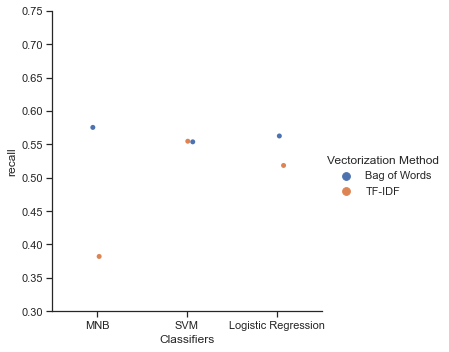

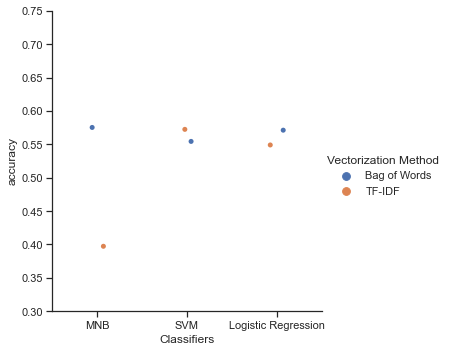

In [271]:
#create all the graphs necessary for plots using seaborn
import matplotlib.pyplot as plt
accuracy_kaggle = [0.57523, 0.39729, 0.55432, 0.57236, 0.57113, 0.54899]
graph_DF = pd.DataFrame({"Classifiers" : classifier_list, "Vectorization Method": vectorization_list, "f1": f1_score_list, "precision"
                         : precision_score_list, "recall": recall_score_list, "accuracy": accuracy_kaggle})

sns.catplot(x = "Classifiers", y = "f1", hue = "Vectorization Method", data = graph_DF)
plt.ylim(0.30, 0.75)
plt.savefig('f1_plot.png')
sns.catplot(x = "Classifiers", y = "precision", hue = "Vectorization Method", data = graph_DF)
plt.ylim(0.30, 0.75)
plt.savefig('precision_plot.png')
sns.catplot(x = "Classifiers", y = "recall", hue = "Vectorization Method", data = graph_DF)
plt.ylim(0.30, 0.75)
plt.savefig('recall_plot.png')
sns.catplot(x = "Classifiers", y = "accuracy", hue = "Vectorization Method", data = graph_DF)
plt.ylim(0.30, 0.75)
plt.savefig('accuracy_plot.png')

In [291]:
import numpy as np
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_scores = cross_validate(dummy_clf, X_train_raw, Y_train, cv=10, scoring=['f1_macro', 'precision_macro', 'recall_macro'])
y_pred_dummy= clfrs(dummy_clf, X_train_raw, X_test_raw, Y_train)
csv_transformer(y_pred_dummy, 'Zero_R_BoW.csv', test_data)


{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  